<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Анализ-игр" data-toc-modified-id="Анализ-игр-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Анализ игр</a></span><ul class="toc-item"><li><span><a href="#Как-критики-относятся-к-спортивным-играм?" data-toc-modified-id="Как-критики-относятся-к-спортивным-играм?-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Как критики относятся к спортивным играм?</a></span></li><li><span><a href="#Критикам-нравятся-больше-игры-на-PC-или-на-PS4?" data-toc-modified-id="Критикам-нравятся-больше-игры-на-PC-или-на-PS4?-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Критикам нравятся больше игры на PC или на PS4?</a></span></li><li><span><a href="#Критикам-больше-нравятся-стрелялки-или-стратегии?" data-toc-modified-id="Критикам-больше-нравятся-стрелялки-или-стратегии?-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Критикам больше нравятся стрелялки или стратегии?</a></span></li></ul></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from collections import Counter
from collections import OrderedDict
import copy
from itertools import groupby

from scipy import stats as st
from scipy.stats import normaltest
from scipy.stats import f_oneway
from scipy.stats import shapiro
from scipy.stats import ttest_rel

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

In [2]:
video_games_df = pd.read_csv('video_games_sales.csv')
video_games_df.head()

,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,VGChartz_Score,Critic_Score,...,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Last_Update,url,status,Vgchartzscore,img_url
0,1,Wii Sports,wii-sports,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,7.7,...,NaN,NaN,NaN,NaN,2006.0,NaN,http://www.vgchartz.com/game/2667/wii-sports/?...,1,NaN,/games/boxart/full_2258645AmericaFrontccc.jpg
1,2,Super Mario Bros.,super-mario-bros,Platform,NaN,NES,Nintendo,Nintendo EAD,NaN,10.0,...,NaN,NaN,NaN,NaN,1985.0,NaN,http://www.vgchartz.com/game/6455/super-mario-...,1,NaN,/games/boxart/8972270ccc.jpg
2,3,Mario Kart Wii,mario-kart-wii,Racing,E,Wii,Nintendo,Nintendo EAD,NaN,8.2,...,NaN,NaN,NaN,NaN,2008.0,11th Apr 18,http://www.vgchartz.com/game/6968/mario-kart-w...,1,8.7,/games/boxart/full_8932480AmericaFrontccc.jpg
3,4,PlayerUnknown's Battlegrounds,playerunknowns-battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,...,NaN,NaN,NaN,NaN,2017.0,13th Nov 18,http://www.vgchartz.com/game/215988/playerunkn...,1,NaN,/games/boxart/full_8052843AmericaFrontccc.jpg
4,5,Wii Sports Resort,wii-sports-resort,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,8.0,...,NaN,NaN,NaN,NaN,2009.0,NaN,http://www.vgchartz.com/game/24656/wii-sports-...,1,8.8,/games/boxart/full_7295041AmericaFrontccc.jpg


In [3]:
video_games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55792 entries, 0 to 55791
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rank            55792 non-null  int64  
 1   Name            55792 non-null  object 
 2   basename        55792 non-null  object 
 3   Genre           55792 non-null  object 
 4   ESRB_Rating     23623 non-null  object 
 5   Platform        55792 non-null  object 
 6   Publisher       55792 non-null  object 
 7   Developer       55775 non-null  object 
 8   VGChartz_Score  0 non-null      float64
 9   Critic_Score    6536 non-null   float64
 10  User_Score      335 non-null    float64
 11  Total_Shipped   1827 non-null   float64
 12  Global_Sales    19415 non-null  float64
 13  NA_Sales        12964 non-null  float64
 14  PAL_Sales       13189 non-null  float64
 15  JP_Sales        7043 non-null   float64
 16  Other_Sales     15522 non-null  float64
 17  Year            54813 non-null 

## Анализ игр 

### Как критики относятся к спортивным играм?

Нас поджидает небольшая проблема. Из 55792 записей оценки критиков стоят только у 6536. Оценить результаты на основании чуть более 10% данных это как-то не круто. Впрочем, нас интересуют оценки только за спортивные игры, надо посмотреть, как там с этим у критиков. 

In [4]:
sport_games_df = video_games_df[video_games_df['Genre'] == 'Sports']
sport_games_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5244 entries, 0 to 55719
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rank            5244 non-null   int64  
 1   Name            5244 non-null   object 
 2   basename        5244 non-null   object 
 3   Genre           5244 non-null   object 
 4   ESRB_Rating     2934 non-null   object 
 5   Platform        5244 non-null   object 
 6   Publisher       5244 non-null   object 
 7   Developer       5244 non-null   object 
 8   VGChartz_Score  0 non-null      float64
 9   Critic_Score    688 non-null    float64
 10  User_Score      8 non-null      float64
 11  Total_Shipped   54 non-null     float64
 12  Global_Sales    2618 non-null   float64
 13  NA_Sales        1985 non-null   float64
 14  PAL_Sales       1900 non-null   float64
 15  JP_Sales        668 non-null    float64
 16  Other_Sales     2311 non-null   float64
 17  Year            5211 non-null   

В общем далее 3/4 документа - попытки (спойлер: безуспешные, но увлекательные) поправить эту проблему, а в самом конце дефолтное решение.

Нда, лучше не стало, по-прежнему имеем чуть более 10% игр, оцененных критиками. Чето они не очень постарались, придется делать за них их работу. Впрочем, юзеры постарались и того меньше - тут оценок вообще 8!!  
Вопрос жизни, вселенной и вообще - и как нам быть. Sales и прочее как-то не шибко помогают понять ситуацию. VG Chartz Score вообще отпадный - там рейтинг указан ровно у НУЛЯ игр. Быстрая прогулка на их сайт тоже не помогла прояснить ситуацию - там сходу у первой 10ки самых кассовых игр всех времен и народов VGChartz_Score = NaN. Ну офигеть теперь. Все приходится делать руками.  
Ок, давайте попытаемся понять, от чего в большей степени может зависеть рейтинг игр и спрогнозировать его.  

In [5]:
# выкинем все строки в которых не определен рейтинг критиков
critics_df = sport_games_df.dropna(subset=['Critic_Score'])
critics_df = critics_df.reset_index(drop=True)
critics_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rank            688 non-null    int64  
 1   Name            688 non-null    object 
 2   basename        688 non-null    object 
 3   Genre           688 non-null    object 
 4   ESRB_Rating     653 non-null    object 
 5   Platform        688 non-null    object 
 6   Publisher       688 non-null    object 
 7   Developer       688 non-null    object 
 8   VGChartz_Score  0 non-null      float64
 9   Critic_Score    688 non-null    float64
 10  User_Score      4 non-null      float64
 11  Total_Shipped   27 non-null     float64
 12  Global_Sales    545 non-null    float64
 13  NA_Sales        516 non-null    float64
 14  PAL_Sales       472 non-null    float64
 15  JP_Sales        125 non-null    float64
 16  Other_Sales     537 non-null    float64
 17  Year            686 non-null    flo

А что такое ESRB и какой он бывает?

In [6]:
set(list(critics_df['ESRB_Rating']))

{'E', 'E10', 'M', 'T', nan}

Тьфу, это возрастной рейтинг. Так, ладно, оно нам не поможет. Хотя хотел бы я знать, что за спортивные игры содержат "жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику". Неужели они сделали симулятор ММА? 

Выкинем все мусорные столбцы типа названия жанра, он у нас и так определен, и начнем, помолясь

In [7]:
corr_df = critics_df.drop(critics_df.columns[[1, 2, 3, 4, 8, 18, 19, 20, 22]], axis='columns')
corr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rank           688 non-null    int64  
 1   Platform       688 non-null    object 
 2   Publisher      688 non-null    object 
 3   Developer      688 non-null    object 
 4   Critic_Score   688 non-null    float64
 5   User_Score     4 non-null      float64
 6   Total_Shipped  27 non-null     float64
 7   Global_Sales   545 non-null    float64
 8   NA_Sales       516 non-null    float64
 9   PAL_Sales      472 non-null    float64
 10  JP_Sales       125 non-null    float64
 11  Other_Sales    537 non-null    float64
 12  Year           686 non-null    float64
 13  Vgchartzscore  27 non-null     float64
dtypes: float64(10), int64(1), object(3)
memory usage: 75.4+ KB


Перед тем как искать корреляцию, глянем на распределение и выбросы продаж

<AxesSubplot:>

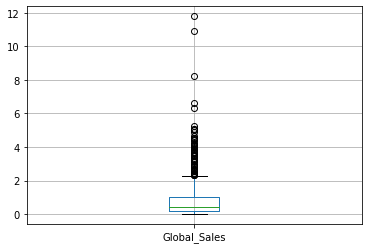

In [8]:
corr_df.boxplot(column=['Global_Sales'])

<AxesSubplot:>

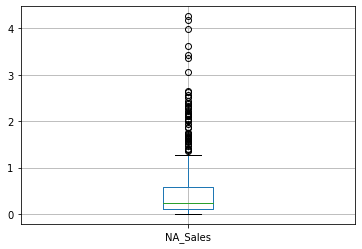

In [9]:
corr_df.boxplot(column=['NA_Sales'])

<AxesSubplot:>

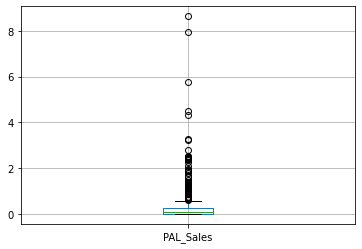

In [10]:
corr_df.boxplot(column=['PAL_Sales'])

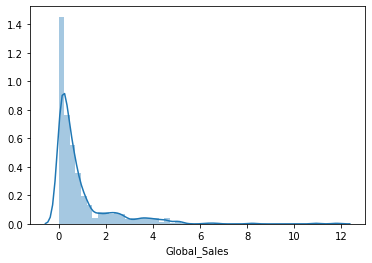

In [11]:
sns_plot = sns.distplot(corr_df['Global_Sales'])
fig = sns_plot.get_figure()

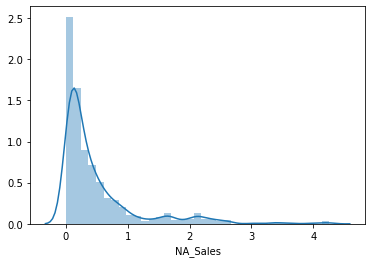

In [12]:
sns_plot = sns.distplot(corr_df['NA_Sales'])
fig = sns_plot.get_figure()

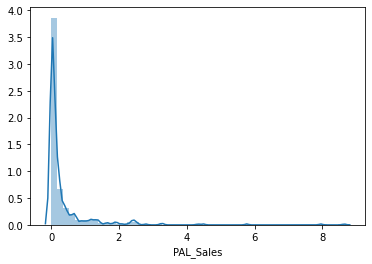

In [13]:
sns_plot = sns.distplot(corr_df['PAL_Sales'])
fig = sns_plot.get_figure()

Ндааа, наше распределение мягко говоря далековато от нормального

Давайте попробуем выкинуть самые самые аномально хайповые продажи, это немного улучшит картину

<AxesSubplot:>

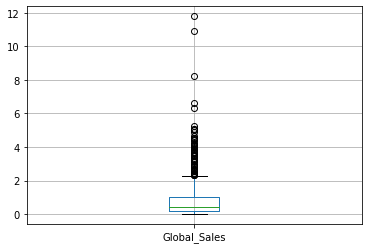

In [14]:
corr_df.boxplot(column=['Global_Sales'])

In [15]:
corr_df_sorted = corr_df.sort_values("Other_Sales", ascending=False)
corr_df_sorted.head(10)

,Rank,Platform,Publisher,Developer,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Vgchartzscore
34,422,PS2,Konami,Konami,8.2,NaN,NaN,3.63,0.05,0.00,0.64,2.93,2008.0,NaN
4,69,PS4,EA Sports,EA Vancouver,8.3,NaN,NaN,11.80,1.27,8.64,0.15,1.73,2017.0,NaN
5,77,PS4,Electronic Arts,EA Canada,8.9,NaN,NaN,10.94,1.26,7.95,0.12,1.61,2016.0,NaN
7,154,PS3,EA Sports,EA Canada,9.2,NaN,NaN,6.65,0.84,4.33,0.11,1.37,2011.0,NaN
6,119,PS4,EA Sports,EA Canada,8.5,NaN,NaN,8.22,1.15,5.77,0.07,1.23,2015.0,NaN
116,1386,PS2,Konami,Konami,7.2,NaN,NaN,1.57,0.10,0.18,0.12,1.16,2009.0,NaN
11,248,PS3,EA Sports,EA Canada,8.7,NaN,NaN,5.08,0.61,3.28,0.06,1.12,2010.0,NaN
8,168,PS4,EA Sports,EA Canada,8.1,NaN,NaN,6.32,0.83,4.49,0.05,0.94,2014.0,NaN
24,357,PS2,EA Sports,Team Fusion,8.4,NaN,NaN,4.11,0.71,2.48,0.03,0.89,2006.0,NaN
20,316,PS2,Konami,Konami Computer Entertainment Tokyo,8.8,NaN,NaN,4.39,0.10,2.39,1.05,0.86,2007.0,NaN


In [16]:
corr_df.drop(corr_df[corr_df.Total_Shipped > 10].index, inplace=True)
corr_df.drop(corr_df[corr_df.Global_Sales > 7].index, inplace=True)
corr_df.drop(corr_df[corr_df.NA_Sales > 4].index, inplace=True)
corr_df.drop(corr_df[corr_df.PAL_Sales > 5].index, inplace=True)
corr_df.drop(corr_df[corr_df.Other_Sales > 1.5].index, inplace=True)


<AxesSubplot:>

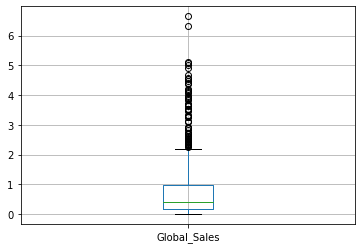

In [17]:
corr_df.boxplot(column=['Global_Sales'])

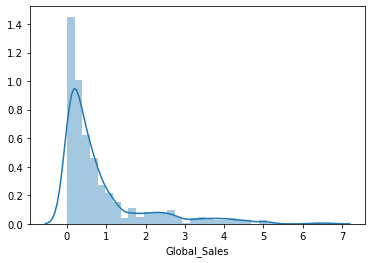

In [18]:
sns_plot = sns.distplot(corr_df['Global_Sales'])
fig = sns_plot.get_figure()

In [19]:
corr_df.corr(method='spearman')

,Rank,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Vgchartzscore
Rank,1.000000,-0.357174,-0.5,-0.999506,-0.999937,-0.824548,-0.752156,-0.206052,-0.913258,-0.326472,-0.436371
Critic_Score,-0.357174,1.000000,-0.5,-0.218758,0.401709,0.419956,0.266115,-0.019468,0.267092,-0.081744,0.861828
User_Score,-0.500000,-0.500000,1.0,NaN,0.500000,0.500000,1.000000,NaN,0.500000,1.000000,NaN
Total_Shipped,-0.999506,-0.218758,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.167907,NaN
Global_Sales,-0.999937,0.401709,0.5,NaN,1.000000,0.824573,0.752217,0.206606,0.913230,0.335303,0.602335
NA_Sales,-0.824548,0.419956,0.5,NaN,0.824573,1.000000,0.394409,-0.268594,0.684864,0.252129,0.604550
PAL_Sales,-0.752156,0.266115,1.0,NaN,0.752217,0.394409,1.000000,0.377385,0.735398,0.379033,0.355955
JP_Sales,-0.206052,-0.019468,NaN,NaN,0.206606,-0.268594,0.377385,1.000000,0.228181,0.103203,0.271672
Other_Sales,-0.913258,0.267092,0.5,NaN,0.913230,0.684864,0.735398,0.228181,1.000000,0.486111,0.546027
Year,-0.326472,-0.081744,1.0,0.167907,0.335303,0.252129,0.379033,0.103203,0.486111,1.000000,-0.000843


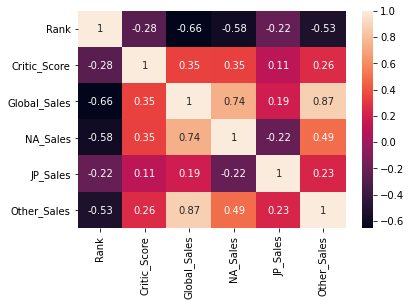

In [20]:
cols = ['Rank', 'Critic_Score', 'Global_Sales', 'NA_Sales', 'JP_Sales', 'Other_Sales']
hm = sns.heatmap(corr_df[cols].corr(),
                 cbar=True,
                 annot=True)

Дополнительно визуализируем наиболее интересные корелляции

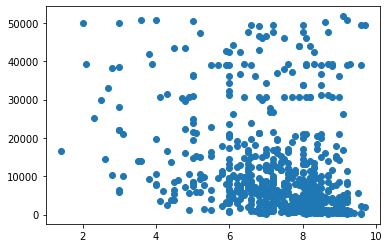

In [21]:
import matplotlib.pyplot as plt
plt.scatter(corr_df['Critic_Score'], corr_df['Rank'])

Нда, в общем и целом получается слабая __отрицательная__ корреляция - для примерно трети игр высокая оценка критиков означает низкие продажи. Что ж, яснее нам жить не стало

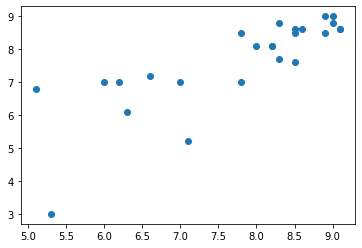

In [22]:
plt.scatter(corr_df['Critic_Score'], corr_df['Vgchartzscore'])

а вот тут все прекрасно - высокие оценки критиков практически линейно ложаться на высокие оценки Vgchartzscore. Одна проблема - этих оценок еще меньше в 20 раз чем оценок критиков

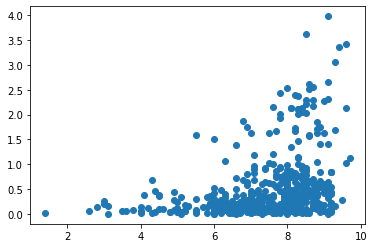

In [23]:
plt.scatter(corr_df['Critic_Score'], corr_df['NA_Sales'])

так, уже горячее - большая часть игр укладывается в параметры "оценка критиков больше 6, NA_Sales меньше 2". Аналогичную зависимость мы видим и в случае Global_Sales, только она чууууть менее коррелирует с рейтингом. 

In [24]:
corr_df[['Critic_Score', 'NA_Sales']].corr(method='kendall')

,Critic_Score,NA_Sales
Critic_Score,1.000000,0.291615
NA_Sales,0.291615,1.000000


По Кендаллу корреляция получается еще меньше, но все равно наблюдается. Ладно, мы сделали все что могли. Вообще по уму тут бы надо бухнуть не корреляцию, а полноценный тест Фишера что-ли, но не будем так углубляться.

Посмотрим, что будет с корреляцией по платформам и конторам, для этого позаменяем все что можно на числа

Вот с этим я реально убился

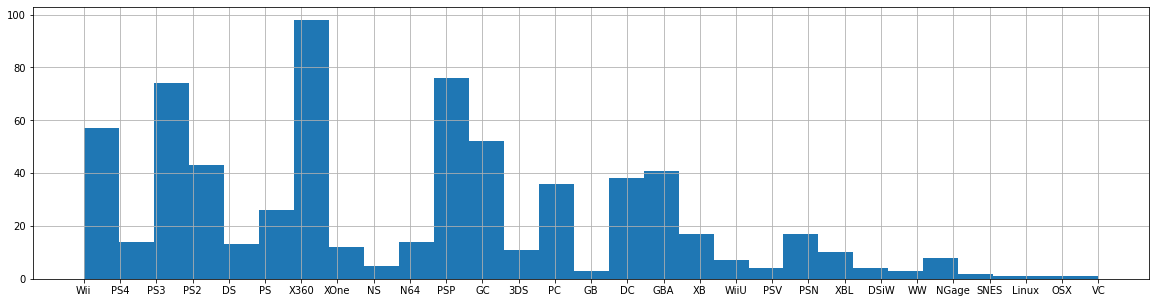

In [25]:
# какие же у нас есть платформы?

platform_list = set(list(critics_df['Platform']))
h = critics_df['Platform'].hist(figsize=(20,5), bins=len(platform_list))
fig = h.get_figure()

Несложно видеть, что есть платформы, которые вообще фактически неизвестны людям. Давайте объединим их для упрощения работы.

In [26]:
'''
Раз уж мы придумали себе проблему - будем весело ее решать, для этого создадим 
список всех платформ, для которых больше 10 игр
Затем заменим в датафрейме названия всех платформ, для которых меньше 10 игр на 0, а названия
платформ, для которых больше 10 игр, на их номер в списке платформ, почищенных от 
тех, которых меньше. Немного запутано звучит и код тоже запутанный, но получается неплохо.
И все это ради того, что бы не писать 23 замены вручную..
'''
pl_count_dict = dict(Counter(list(critics_df['Platform'])))
platforms_list = list(pl_count_dict)

pl_count_copy_dict = copy.deepcopy(pl_count_dict)
remove = [k for k in pl_count_copy_dict.keys() if pl_count_copy_dict[k] < 10]
for k in remove: del pl_count_copy_dict[k]
pl_count_list = list(pl_count_copy_dict)
replace_list = []
for k in pl_count_dict.keys():
    if k in pl_count_list:
        replace_list.append(pl_count_list.index(k)+1)
    else:
        replace_list.append(0)


**Лепота!**

In [27]:
corr_df['Platform'].replace(to_replace = platforms_list, value = replace_list, inplace=True)
corr_df

,Rank,Platform,Publisher,Developer,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Vgchartzscore
7,154,3,EA Sports,EA Canada,9.2,NaN,NaN,6.65,0.84,4.33,0.11,1.37,2011.0,NaN
8,168,2,EA Sports,EA Canada,8.1,NaN,NaN,6.32,0.83,4.49,0.05,0.94,2014.0,NaN
10,246,5,Sega,Sega,7.0,NaN,NaN,5.10,1.63,2.46,0.44,0.57,2008.0,NaN
11,248,3,EA Sports,EA Canada,8.7,NaN,NaN,5.08,0.61,3.28,0.06,1.12,2010.0,NaN
12,252,6,Activision,Neversoft Entertainment,9.6,NaN,NaN,5.02,3.42,1.38,0.02,0.20,1999.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683,50562,13,Sega,Eurocom Entertainment Software,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010.0,NaN
684,50731,14,Sega,Hitmaker,9.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000.0,NaN
685,50732,0,Sega,Hitmaker,3.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.0,NaN
686,50841,0,Virtual Toys,Virtual Toys,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010.0,NaN


Кто у нас что пубиликовал и разрабатывал?

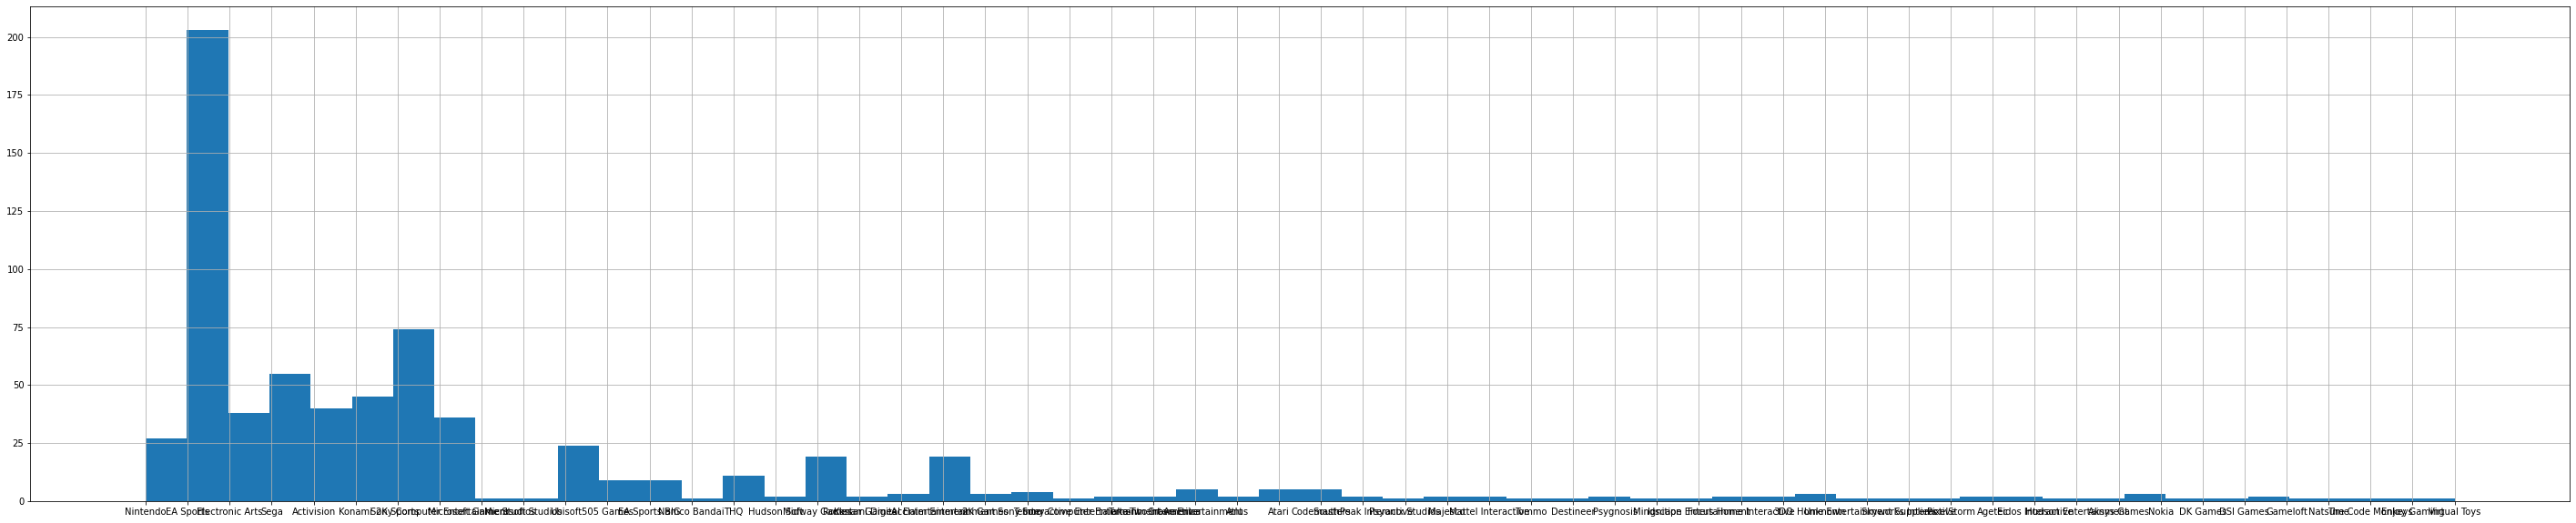

In [28]:
# какие же у нас есть платформы?
pub_list = set(list(critics_df['Publisher']))
h = critics_df['Publisher'].hist(figsize=(50,10), bins=len(pub_list))
fig = h.get_figure()

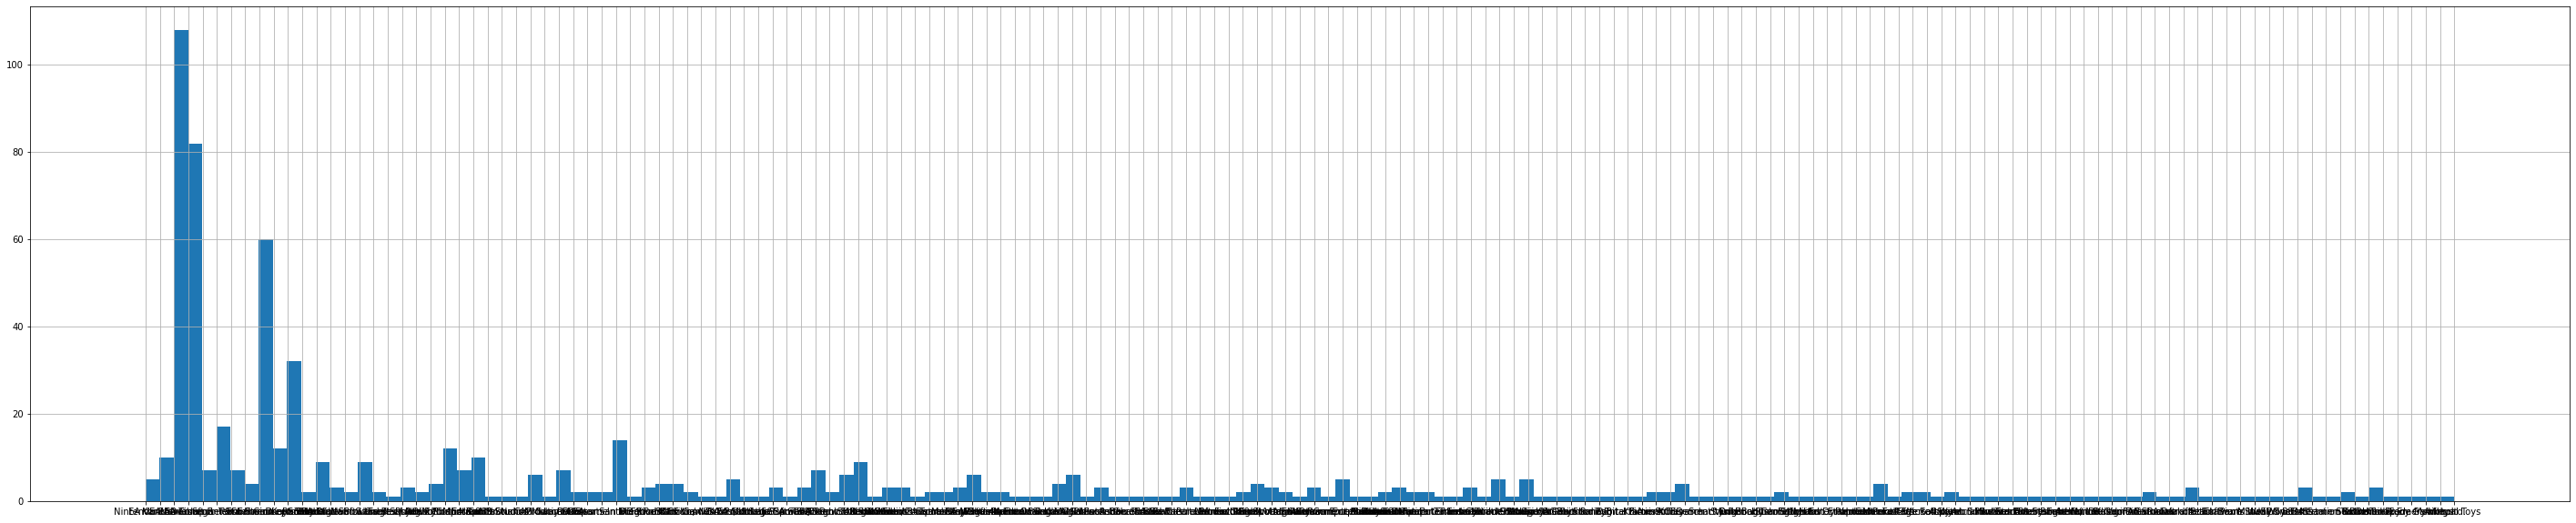

In [29]:
dev_list = set(list(critics_df['Developer']))
h = critics_df['Developer'].hist(figsize=(50,10), bins=len(dev_list))
fig = h.get_figure()

ой как все запущено...

In [30]:
pub_count_dict = dict(Counter(list(critics_df['Publisher'])))

In [31]:
pub_count_dict

{'Nintendo': 27,
 'EA Sports': 203,
 'Electronic Arts': 38,
 'Sega': 55,
 'Activision': 40,
 'Konami': 45,
 '2K Sports': 74,
 'Sony Computer Entertainment': 36,
 'Microsoft Game Studios': 1,
 'Microsoft Studios': 1,
 'Ubisoft': 24,
 '505 Games': 9,
 'EA Sports BIG': 9,
 'Namco Bandai': 1,
 'THQ': 11,
 'Hudson Soft': 2,
 'Midway Games': 19,
 'Rockstar Games': 2,
 'Konami Digital Entertainment': 3,
 'Acclaim Entertainment': 19,
 '2K Games': 3,
 'Tecmo': 4,
 'Sony Interactive Entertainment': 1,
 'Sony Computer Entertainment America': 2,
 'Take-Two Interactive': 2,
 'Crave Entertainment': 5,
 'Atlus': 2,
 'Atari': 5,
 'Codemasters': 5,
 'SouthPeak Interactive': 2,
 'Psyonix Studios': 1,
 'Majesco': 2,
 'Mattel Interactive': 2,
 'Tommo': 1,
 'Destineer': 1,
 'Psygnosis': 2,
 'Mindscape': 1,
 'Ignition Entertainment': 1,
 'Focus Home Interactive': 2,
 '3DO': 2,
 'Unknown': 3,
 'Home Entertainment Suppliers': 1,
 'Skyworks Interactive': 1,
 'PixelStorm': 1,
 'Agetec': 2,
 'Eidos Interactive':

In [32]:
publishers_list = list(pub_count_dict)

pub_count_copy_dict = copy.deepcopy(pub_count_dict)
remove = [k for k in pub_count_copy_dict.keys() if pub_count_copy_dict[k] < 5]
for k in remove: del pub_count_copy_dict[k]
pub_count_list = list(pub_count_copy_dict)
pub_replace_list = []
for k in pub_count_dict.keys():
    if k in pub_count_list:
        pub_replace_list.append(pub_count_list.index(k)+1)
    else:
        pub_replace_list.append(0)

Все красиво, но надо вручную поправить несколько значений - EA Sports и Electronic Arts это, по сути, одно и тоже, как и все игро-подразделения Sony

In [33]:
pub_replace_list[2] = 2
pub_replace_list[22] = 8
pub_replace_list[23] = 8

In [34]:
corr_df['Publisher'].replace(to_replace = publishers_list, value = pub_replace_list, inplace=True)

ну и аналогично раскидаем с девелоперами

In [35]:
dev_count_dict = dict(Counter(list(critics_df['Developer'])))
dev_sort_dict = OrderedDict(sorted(dev_count_dict.items(), key=lambda t: t[0]))
dev_sort_dict

OrderedDict([('10tacle Studios AG', 1),
             ('2K Czech', 3),
             ('2K Sports', 5),
             ('989 Sports', 4),
             ('989 Studios', 1),
             ('Acclaim', 1),
             ('Acclaim Entertainment', 5),
             ('Action Pants Inc.', 1),
             ('Adrenalin Entertainment', 2),
             ('AlphaDream Corporation', 1),
             ('Amusement Vision', 1),
             ('Anchor', 1),
             ('Ars System Works', 1),
             ('Asobo Studio', 1),
             ('Aspyr', 1),
             ('Athletic Design AB', 1),
             ('Attention To Detail', 1),
             ('Avalanche Software', 3),
             ('Backbone Emeryville', 1),
             ('Backbone Entertainment', 1),
             ('Bandai Namco Games', 1),
             ('Bandai Namco Games / NOW Production', 1),
             ('Black Box', 1),
             ('Blitz Games', 2),
             ('Blue Castle Games', 3),
             ('Bongfish GmbH', 1),
             ('Boss Game Stu

Нда, тут уже руками будет поправить сложновато

In [36]:
# Откатимся и начнем с начала и уже на основании этого 
# словаря сперва приведем в порядок датафрейм


corr_df['Developer'].replace('2K Czech', '2K', inplace=True)
corr_df['Developer'].replace('2K Sports', '2K', inplace=True)
corr_df['Developer'].replace('989 Sports', '989 Studios', inplace=True)
corr_df['Developer'].replace('Acclaim', 'Acclaim Entertainment', inplace=True)
corr_df['Developer'].replace('EA Black Box', 'Electronic Arts', inplace=True)
corr_df['Developer'].replace('EA Canada', 'Electronic Arts', inplace=True)
corr_df['Developer'].replace('EA Montreal', 'Electronic Arts', inplace=True)
corr_df['Developer'].replace('EA Redwood Shores', 'Electronic Arts', inplace=True)
corr_df['Developer'].replace('EA Salt Lake', 'Electronic Arts', inplace=True)
corr_df['Developer'].replace('EA Seattle', 'Electronic Arts', inplace=True)
corr_df['Developer'].replace('EA Sports', 'Electronic Arts', inplace=True)
corr_df['Developer'].replace('EA Tiburon', 'Electronic Arts', inplace=True)
corr_df['Developer'].replace('EA Vancouver', 'Electronic Arts', inplace=True)
corr_df['Developer'].replace('Full-Fat', 'Full Fat', inplace=True)
corr_df['Developer'].replace('HB Studios', 'HB Studios Multimedia', inplace=True)
corr_df['Developer'].replace('Konami', 'Konami Computer Entertainment', inplace=True)
corr_df['Developer'].replace('Konami Computer Entertainment Hawaii', 'Konami Computer Entertainment', inplace=True)
corr_df['Developer'].replace('Konami Computer Entertainment Nagoya', 'Konami Computer Entertainment', inplace=True)
corr_df['Developer'].replace('Konami Computer Entertainment Osaka', 'Konami Computer Entertainment', inplace=True)
corr_df['Developer'].replace('Konami Computer Entertainment Tokyo', 'Konami Computer Entertainment', inplace=True)
corr_df['Developer'].replace('Midway', 'Midway Games', inplace=True)
corr_df['Developer'].replace('Nintendo', 'Nintendo EAD', inplace=True)
corr_df['Developer'].replace('SCE San Diego Studio', 'SIE San Diego Studio', inplace=True)
corr_df['Developer'].replace('SCEA San Diego Studios', 'SIE San Diego Studio', inplace=True)
corr_df['Developer'].replace('SCEA', 'Sony', inplace=True)
corr_df['Developer'].replace('SCEE London Studio', 'Sony', inplace=True)
corr_df['Developer'].replace('Sony Computer Entertainment', 'Sony', inplace=True)
corr_df['Developer'].replace('Sega Sports R&D', 'Sega', inplace=True)
corr_df['Developer'].replace('Sega Studios Australia', 'Sega', inplace=True)
corr_df['Developer'].replace('Sega-AM2', 'Sega', inplace=True)
corr_df['Developer'].replace('Ubisoft Barcelona', 'Ubisoft', inplace=True)
corr_df['Developer'].replace('Ubisoft Milan', 'Ubisoft', inplace=True)
corr_df['Developer'].replace('Ubisoft Montreal', 'Ubisoft', inplace=True)
corr_df['Developer'].replace('Ubisoft Vancouver', 'Ubisoft', inplace=True)
corr_df['Developer'].replace('Z-Axis', 'Z-Axis, Ltd.', inplace=True)

# и еще разок повторим
dev_count_dict = dict(Counter(list(corr_df['Developer'])))
dev_sort_dict = OrderedDict(sorted(dev_count_dict.items(), key=lambda t: t[0]))
dev_sort_dict

OrderedDict([('10tacle Studios AG', 1),
             ('2K', 8),
             ('989 Studios', 5),
             ('Acclaim Entertainment', 6),
             ('Action Pants Inc.', 1),
             ('Adrenalin Entertainment', 2),
             ('AlphaDream Corporation', 1),
             ('Amusement Vision', 1),
             ('Anchor', 1),
             ('Ars System Works', 1),
             ('Asobo Studio', 1),
             ('Aspyr', 1),
             ('Athletic Design AB', 1),
             ('Attention To Detail', 1),
             ('Avalanche Software', 3),
             ('Backbone Emeryville', 1),
             ('Backbone Entertainment', 1),
             ('Bandai Namco Games', 1),
             ('Bandai Namco Games / NOW Production', 1),
             ('Black Box', 1),
             ('Blitz Games', 2),
             ('Blue Castle Games', 3),
             ('Bongfish GmbH', 1),
             ('Boss Game Studios', 1),
             ('Bottoms Up', 1),
             ('Bright Future', 1),
             ('Buzz 

Совсем другое дело!

In [37]:
devs_list = list(dev_sort_dict)

dev_sort_copy_dict = copy.deepcopy(dev_sort_dict)
remove = [k for k in dev_sort_copy_dict.keys() if dev_sort_copy_dict[k] < 5]
for k in remove: del dev_sort_copy_dict[k]
dev_count_list = list(dev_sort_copy_dict)
dev_replace_list = []
for k in dev_sort_dict.keys():
    if k in dev_count_list:
        dev_replace_list.append(dev_count_list.index(k)+1)
    else:
        dev_replace_list.append(0)

In [38]:
corr_df['Developer'].replace(to_replace = devs_list, value = dev_replace_list, inplace=True)

In [39]:
# И окончательно выкинем все столбцы, которыми не собирались пользоваться
corr_df = corr_df.drop(corr_df.columns[[5, 6, 10, 12, 13]], axis='columns')
corr_df

,Rank,Platform,Publisher,Developer,Critic_Score,Global_Sales,NA_Sales,PAL_Sales,Other_Sales
7,154,3,2,7,9.2,6.65,0.84,4.33,1.37
8,168,2,2,7,8.1,6.32,0.83,4.49,0.94
10,246,5,4,15,7.0,5.10,1.63,2.46,0.57
11,248,3,2,7,8.7,5.08,0.61,3.28,1.12
12,252,6,5,13,9.6,5.02,3.42,1.38,0.20
...,...,...,...,...,...,...,...,...,...
683,50562,13,4,0,5.0,NaN,NaN,NaN,NaN
684,50731,14,4,0,9.2,NaN,NaN,NaN,NaN
685,50732,0,4,0,3.6,NaN,NaN,NaN,NaN
686,50841,0,0,0,4.0,NaN,NaN,NaN,NaN


Итак, осталось посмотреть корреляцию платформы, разработчика и издателя с оценками критиков

In [40]:
corr_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 678 entries, 7 to 687
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          678 non-null    int64  
 1   Platform      678 non-null    int64  
 2   Publisher     678 non-null    int64  
 3   Developer     678 non-null    int64  
 4   Critic_Score  678 non-null    float64
 5   Global_Sales  539 non-null    float64
 6   NA_Sales      510 non-null    float64
 7   PAL_Sales     466 non-null    float64
 8   Other_Sales   531 non-null    float64
dtypes: float64(5), int64(4)
memory usage: 53.0 KB


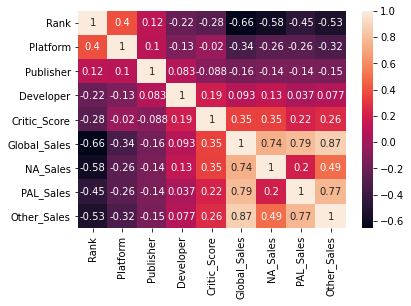

In [41]:
cols = ['Rank', 'Platform', 'Publisher', 'Developer', 'Critic_Score', 'Global_Sales', 'NA_Sales', 'PAL_Sales', 'Other_Sales']
hm = sns.heatmap(corr_df[cols].corr(),
                 cbar=True,
                 annot=True)

Эх, ради чего и мучались.. Что же, уличить критиков в проплаченности и однозначной симпатии к конкретной платформе или студии нам не удалось.  
Итак, в сухом остатке  
* Ниже среднего отрицательная корреляция с рангом
* Ниже среднего, но побольше положительная  корреляция с Global Sales
* Такая же с NA Sales
* Чуть меньшая положительная с Other Sales
* Еще немного меньше с PAL Sales

В целом наша задача сейчас - построить модель, максимально правдоподобно описывающую зависимость оценок критиков от указанных параметров. Попробуем извратится с разнообразными нелинейными моделями.

немного укопавшись в теорию перед применением кучи разных методов мы выясняем, что есть некоторые ограничения

Во-первых, нам желательно нормальное распределение предсказываемой величины.

In [42]:
# Тест Шапиро-Уилка показывает, что данные распределены нормально
data = critics_df['Critic_Score']
stat, p = shapiro(data)
stat, p

(0.9213933348655701, 1.8529941735499453e-18)

Далее нам необходимо отсутствие мультиколлинеарности. Теория учит нас следующему. Когда независимые переменные коррелируют друг с другом, говорят о возникновении мультиколлинеарности.

В машинном обучении мультиколлинеарность может стать причиной переобучаемости модели, что приведет к неверному результату. Кроме того, избыточные коэффициенты увеличивают сложность модели машинного обучения, а значит, время ее тренировки возрастает. Еще мультиколлинеарность факторов плоха тем, что математическая модель регрессии содержит избыточные переменные, а это значит:

* осложняется интерпретация параметров множественной регрессии как величин действия факторов, параметры регрессии теряют смысл и следует рассматривать другие переменные;
* оценки параметров ненадежны – получаются большие стандартные ошибки, которые меняются с изменением объема наблюдений, что делает модель регрессии непригодной для прогнозирования.
 

С мультиколлинеарностью у нас все довольно плохо и это логически ясно даже без тестов, потому что топовые игры имеют высокий уровень продаж во всех регионах, потому они и называются топовыми, а неуспешные игры обычно проваливаются почти на всех рынках. В итоге можно сделать вывод о том, что эти данные сильно зависимы.

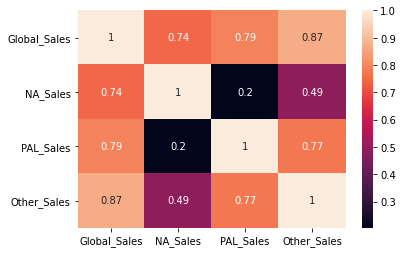

In [43]:
# Мне очень понравилась красивая тепловая карта, так что не грех показать ее еще разок

cols = ['Global_Sales', 'NA_Sales', 'PAL_Sales', 'Other_Sales']
hm = sns.heatmap(corr_df[cols].corr(),
                 cbar=True,
                 annot=True)

Ужас, почти все столбцы продаж имеют сильную корреляцию между собой! Отсюда мораль, можем смело выкидывать все, кроме NA_Sales и PAL_Sales.  
Далее неплохо бы было провести тест на гетероскедастичность, но мы не будем так заморачиваться.

In [44]:
# Отделим от нашей выборки прогнозные значения:
corr_df.dropna(inplace=True)
X = corr_df.drop(['Rank', 'Critic_Score', 'Platform', 'Publisher', 'Developer', 'Global_Sales', 'Other_Sales'], axis=1)
y = corr_df['Critic_Score']

In [45]:
X

,NA_Sales,PAL_Sales
7,0.84,4.33
8,0.83,4.49
10,1.63,2.46
11,0.61,3.28
12,3.42,1.38
...,...,...
555,0.01,0.00
556,0.00,0.00
557,0.00,0.00
560,0.00,0.00


Рассмотрим несколько моделей, хотя и так ясно, что линейная регрессия нам не сильно поможет

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [47]:
# метод наименьших квадратов - он же линейная регрессия
LRreg = LinearRegression().fit(X_train, y_train)
LRy_pred = LRreg.predict(X_test)
print('r2_score:', r2_score(y_test, LRy_pred)) 

r2_score: 0.17870708285874382


<AxesSubplot:xlabel='Critic_Score'>

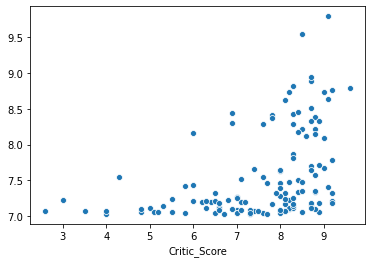

In [48]:
sns.scatterplot(y_test, LRy_pred)

в случае отличного предсказания все точки лежали бы на прямой под углом 45 градусов, а здесь мы видим настоящий кошмар, чего и следовало ожидать

In [49]:
# случайный лес
RFreg = RandomForestRegressor(n_estimators=500, max_features ='sqrt').fit(X_train, y_train)
RFy_pred = RFreg.predict(X_test)
print('r2_score:', r2_score(y_test, RFy_pred))

r2_score: -0.050108046983377674


<AxesSubplot:xlabel='Critic_Score'>

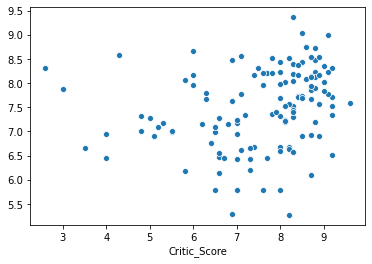

In [50]:
sns.scatterplot(y_test, RFy_pred)

In [51]:
# метод ближайших соседей
KNreg = KNeighborsRegressor(n_neighbors=6).fit(X_train, y_train)
KNy_pred = KNreg.predict(X_test)
print('r2_score:', r2_score(y_test, KNy_pred))

r2_score: 0.01887849152631227


<AxesSubplot:xlabel='Critic_Score'>

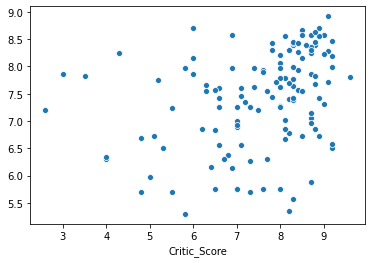

In [52]:
sns.scatterplot(y_test, KNy_pred)

В общем из коробки все эти модели работают кошмарно

Есть еще изуверский вариант попробовать что-то типа полиномиальных фич, но я не шибко пока разобрался, как конвертировать результат их работы во вменяемый ответ

In [53]:
model = LinearRegression()
poly = PolynomialFeatures(degree=3, include_bias=False)
X_new = poly.fit_transform(X_train)
model.fit(X_new, y_train)
y_pred = model.predict(X_new)

In [54]:
print(y_pred)

[ 7.56668637  8.28903298  7.64599197  7.30643933  6.90193259  6.98532197
  6.70738576  6.83859987  6.72840952  6.7001387   7.07447947  8.00790208
  6.94423322  8.00344078  6.98587216  7.87970294  6.77151158  7.20695619
  7.44755394  8.45387633  7.64731867  7.51157143  8.37380131  7.65316606
  7.20566657  8.11738555  6.66416796  6.84473877  7.47309526  7.52632312
  7.53138756  7.79187222  7.39667393  6.98012905  6.66416796  8.41071774
  8.07578686  7.03947622  7.60226265  7.45553789  6.98826548  7.83459411
  7.9700682   6.9702987   6.56799983  8.98320458  6.982526    6.88339044
  7.43210441  6.95343028  7.41686047  8.06426403  7.29212606  7.57505893
  7.85953217  7.48725976  6.75638955  7.78325302  6.64271875  7.46797912
  6.63508446  7.61452003  7.7204906   7.48370333  7.7932541   7.04079913
  7.95485144  7.07077003  7.86045998  7.21889114  8.45387633  8.08414233
  6.69295648  8.16357966  7.05432976  7.56118893  7.53648685  6.60570448
  7.63772298  7.56604521  7.1639328   8.40000504  8

Еще есть альтернатива попробовать другие нелинейные модели, но прикол в том, что те же деревья не дали адекватного результата.  
В итоге я убил кучу времени, в результате получив шыш:)

Какой ценный опыт я извлек в процессе?  
* надо знать на порядки больше sklearn, чего нам не рассказывали, увы  
* в разы больше практики с разными моделями
* полностью осознал чего эта фигня по сути делает - фактически мне надо было решить задачу отыскания интерполирующего полинома (ну или добиться того же результата еще кучей разных техник), причем статистика в этом плане отличается от того, что я делал когда-то только бэкграундом (со всеми этими надматематическими предположениями о взаимосвязи данных и тп) ну и статистическими оценками насколько можно доверять полученному решению.  
* а технически - когда я осознал что от меня требуется, то понял, что легко решил бы эту задачу в Matlab на чистом матане, даже без особого привлечения хипстерских терминов вроде полиномиальных фич, обучения моделей и тд и тп, которые слегка наводят тень на плетень:) в мое время мы называли такие штуки обычными задачами интерполяции  
* ну и тут я облажался в основном потому что очень плохо знаю этот инструмент пока, в частности sklearn, его функции, их настройки и кучу всяких тонкостей и во всем этом нужно разбираться. То есть до меня дошло, чего от меня хотят, но как это выразить синтаксисом Питона - пока нет. Так что надо дальше развлекаться.

Ну и наконец давайте просто в лоб решим поставленную в начале задачу, раз уж наш поход вглубь не принес результатов. 

In [55]:
# сначала для извлечения списка я использовал функцию set, но быстро осознал, что она 
# не сохраняет порядок, так что пришлось немного покостылить
genres_list = list(video_games_df['Genre'])

In [56]:
!pip install more_itertools

In [57]:
from more_itertools import unique_everseen
genres_unq = sorted(list(unique_everseen(genres_list)))
genres_unq

['Action',
 'Action-Adventure',
 'Adventure',
 'Board Game',
 'Education',
 'Fighting',
 'MMO',
 'Misc',
 'Music',
 'Party',
 'Platform',
 'Puzzle',
 'Racing',
 'Role-Playing',
 'Sandbox',
 'Shooter',
 'Simulation',
 'Sports',
 'Strategy',
 'Visual Novel']

In [58]:
# поскольку join и merge у меня упорно отказывались работать как надо в цикле
# пришлось ехать из Питера в Москву через Дагестан и обойти проблему словарем

list_dict = {}
for genre in genres_unq:
    genre_critics_df = video_games_df[video_games_df['Genre'] == genre].dropna(subset=['Critic_Score']).reset_index(drop=True)
    genre_critics_df = genre_critics_df.drop(genre_critics_df.columns[[0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]], axis='columns')
    genre_critics_df.rename(columns={'Critic_Score': genre}, inplace=True)
    genre_list = list(genre_critics_df[genre])
    list_dict.setdefault(genre, genre_list)
critics_total = pd.DataFrame.from_dict(list_dict, orient='index').transpose()

# в итоге у нас получился отличный датафрейм с критикой по жанрам
critics_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024 entries, 0 to 1023
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Action            1024 non-null   float64
 1   Action-Adventure  99 non-null     float64
 2   Adventure         394 non-null    float64
 3   Board Game        1 non-null      float64
 4   Education         1 non-null      float64
 5   Fighting          328 non-null    float64
 6   MMO               10 non-null     float64
 7   Misc              338 non-null    float64
 8   Music             25 non-null     float64
 9   Party             15 non-null     float64
 10  Platform          564 non-null    float64
 11  Puzzle            285 non-null    float64
 12  Racing            463 non-null    float64
 13  Role-Playing      857 non-null    float64
 14  Sandbox           1 non-null      float64
 15  Shooter           843 non-null    float64
 16  Simulation        229 non-null    float64


In [59]:
# выкинем мусор
critics_total.drop(critics_total.columns[[1,3,4,6,8,9,14,19]], axis='columns', inplace=True)
critics_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024 entries, 0 to 1023
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Action        1024 non-null   float64
 1   Adventure     394 non-null    float64
 2   Fighting      328 non-null    float64
 3   Misc          338 non-null    float64
 4   Platform      564 non-null    float64
 5   Puzzle        285 non-null    float64
 6   Racing        463 non-null    float64
 7   Role-Playing  857 non-null    float64
 8   Shooter       843 non-null    float64
 9   Simulation    229 non-null    float64
 10  Sports        688 non-null    float64
 11  Strategy      369 non-null    float64
dtypes: float64(12)
memory usage: 96.1 KB


In [60]:
cd = critics_total.dropna()

сделаем все по канону и узнаем, одинаковые ли дисперсии  


In [61]:
headers_list =  cd.columns.values.tolist() 
var_list = [np.var(cd[header]) for header in headers_list]
var_list

[1.301956484430122,
 2.0845388150492923,
 1.5927179115577506,
 2.1357483648290443,
 1.8538456551171785,
 1.309639785663889,
 1.6173326214221697,
 0.9063389332773976,
 1.4296599988558574,
 2.3710165710036057,
 0.9302946168074595,
 1.6472557731545927]

нас интересует вот это значение 0,93... Максимально близкая к нему дисперсия у Role-Playing и Action

In [62]:
normal_list = []
for header in headers_list:
    shapiro_test = st.shapiro(cd[header])
    p = shapiro_test.pvalue
    normal_list.append(p)
normal_list

[6.66134809534924e-08,
 1.5393061403301544e-07,
 5.636842104195239e-10,
 6.349456782572815e-08,
 9.851697541307658e-06,
 2.8552156550176733e-07,
 1.6755862475292815e-07,
 2.5622273369663162e-06,
 2.8301768040250863e-08,
 8.579211646653206e-11,
 2.959867373419911e-08,
 4.4182604796993985e-10]

Как видим распределение везде нормальное

In [63]:
data0 = cd['Sports']
data1 = cd['Action']
data2 = cd['Role-Playing']
data3 = cd['Shooter']
data4 = cd['Platform']

f_onewayResult = f_oneway(data0, data1, data2)
f_onewayResult

F_onewayResult(statistic=1.2052121989807447, pvalue=0.30026388221220257)

__Итак, использовав тест ANOVA, мы показали что распределение оценок для этих жанров явно не совпадает__

In [64]:
st.ttest_rel(data0,data1)

Ttest_relResult(statistic=-1.5466566622503217, pvalue=0.12333293311039985)

In [65]:
st.ttest_rel(data0,data2)

Ttest_relResult(statistic=-1.0203578228982506, pvalue=0.3086402401975975)

In [66]:
st.ttest_rel(data0,data3)

Ttest_relResult(statistic=-0.0772574246043542, pvalue=0.9384865136367495)

In [67]:
st.ttest_rel(data0,data4)

Ttest_relResult(statistic=4.287956245550483, pvalue=2.663116413197523e-05)

__А вот что нам сказал парный тест Стьюдента. При альфа = 0.05 его не проходят все, кроме Platform!__ 

Ок, прогоним все это добро через Welch’s t-test 

In [68]:
st.ttest_ind(data0, data1, equal_var = False)

Ttest_indResult(statistic=-1.496098255097224, pvalue=0.1353389861607342)

In [69]:
st.ttest_ind(data0, data2, equal_var = False)

Ttest_indResult(statistic=-0.9633539328989955, pvalue=0.3358806029576554)

In [70]:
st.ttest_ind(data0, data3, equal_var = False)

Ttest_indResult(statistic=-0.07296742778636635, pvalue=0.9418654638068378)

In [71]:
st.ttest_ind(data0, data4, equal_var = False)

Ttest_indResult(statistic=3.7343772919143317, pvalue=0.00021474549780235188)

В общем парные тесты показали нам картину куда более интересную - согластно Студенту и Уэльшу критики с такой же предвзятостью как к спорт.играм относятся разве что к платформерам. их они оценивают более-менее равным образом

Ну и сравним еще с константой, принимая, что если средний рейтинг игр выше 3/4 максимального балла, то игры критикам нравятся

In [72]:
# обратите внимание, что тут мы колупали почти оригинальный датасет
alpha = 0.05
result = st.ttest_1samp(critics_df['Critic_Score'], 7.5) 
if (result.statistic > 0) & (result.pvalue / 2 < alpha):
    print('Отвергаем нулевую гипотезу, среднее меньше 7.5')
else:
    print('Не отвергаем нулевую гипотезу, спорт нравится критикам')

Не отвергаем нулевую гипотезу, спорт нравится критикам


__В итоге критикам таки нравятся спортивные игры, при этом распределение их оценок схоже разве что с платформерами и отличается от прочих__

### Критикам нравятся больше игры на PC или на PS4?

Ну в принципе тут процедура полностью аналогична, только мы так извращаться больше не станем и посчитаем все сразу

In [73]:
games_pc_df = video_games_df[video_games_df['Platform'] == 'PC']
games_pc_df = games_pc_df.dropna(subset=['Critic_Score'])
games_pc_df = games_pc_df.reset_index(drop=True)
games_pc_df.drop(games_pc_df.columns[[8,10,11,13,15,18,19,20,21,22]], axis='columns', inplace=True)
games_pc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 865 entries, 0 to 864
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          865 non-null    int64  
 1   Name          865 non-null    object 
 2   basename      865 non-null    object 
 3   Genre         865 non-null    object 
 4   ESRB_Rating   724 non-null    object 
 5   Platform      865 non-null    object 
 6   Publisher     865 non-null    object 
 7   Developer     865 non-null    object 
 8   Critic_Score  865 non-null    float64
 9   Global_Sales  398 non-null    float64
 10  PAL_Sales     384 non-null    float64
 11  Other_Sales   363 non-null    float64
 12  Year          864 non-null    float64
dtypes: float64(5), int64(1), object(7)
memory usage: 88.0+ KB


In [74]:
games_ps4_df = video_games_df[video_games_df['Platform'] == 'PS4']
games_ps4_df = games_ps4_df.dropna(subset=['Critic_Score'])
games_ps4_df = games_ps4_df.reset_index(drop=True)
games_ps4_df.drop(games_ps4_df.columns[[8,10,11,13,15,18,19,20,21,22]], axis='columns', inplace=True)
games_ps4_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          109 non-null    int64  
 1   Name          109 non-null    object 
 2   basename      109 non-null    object 
 3   Genre         109 non-null    object 
 4   ESRB_Rating   104 non-null    object 
 5   Platform      109 non-null    object 
 6   Publisher     109 non-null    object 
 7   Developer     109 non-null    object 
 8   Critic_Score  109 non-null    float64
 9   Global_Sales  84 non-null     float64
 10  PAL_Sales     76 non-null     float64
 11  Other_Sales   82 non-null     float64
 12  Year          109 non-null    float64
dtypes: float64(5), int64(1), object(7)
memory usage: 11.2+ KB


In [75]:
print('games_pc var = ', np.var(games_pc_df['Critic_Score']))
print('games_ps4 var = ', np.var(games_ps4_df['Critic_Score']))

games_pc var =  2.057393110361195
games_ps4 var =  1.6364009763487923


In [76]:
shapiro_test = st.shapiro(games_pc_df['Critic_Score'])
print('games_pc shapiro_test = ', shapiro_test.pvalue)
shapiro_test = st.shapiro(games_ps4_df['Critic_Score'])
print('games_ps4 shapiro_test = ', shapiro_test.pvalue)

games_pc shapiro_test =  1.7335325677314844e-22
games_ps4 shapiro_test =  2.9303817150605482e-09


In [77]:
data0 = games_pc_df['Critic_Score']
data1 = games_ps4_df['Critic_Score']
st.ttest_ind(data0, data1, equal_var = False)

Ttest_indResult(statistic=-2.7394476056351627, pvalue=0.006931808250254211)

Вывод - игры нравятся критикам одинаково 

### Критикам больше нравятся стрелялки или стратегии?

Ну и тащемто последний совсем несложный вопрос 

In [ ]:
shooter_df = video_games_df[video_games_df['Genre'] == 'Shooter']
shooter_df = shooter_df.dropna(subset=['Critic_Score'])
shooter_df = shooter_df.reset_index(drop=True)
shooter_df.drop(shooter_df.columns[[8,10,11,13,15,18,19,20,21,22]], axis='columns', inplace=True)
shooter_df.info()

In [ ]:
strategy_df = video_games_df[video_games_df['Genre'] == 'Strategy']
strategy_df = strategy_df.dropna(subset=['Critic_Score'])
strategy_df = strategy_df.reset_index(drop=True)
strategy_df.drop(strategy_df.columns[[8,10,11,13,15,18,19,20,21,22]], axis='columns', inplace=True)
strategy_df.info()

In [ ]:
result = st.ttest_ind(shooter_df['Critic_Score'], strategy_df['Critic_Score'], equal_var=False)
print(result)

критики оперелеленно предпочитают шутеры стратегиям